In [ ]:
!pip install yfinance plotly keras tensorflow

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import yfinance as yf

In [ ]:
df = yf.download('MSFT', start='2010-01-01' , end='2022-07-30')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.474918,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.482498,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.338398,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.095680,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.254957,51197400


In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: xlabel='Date'>

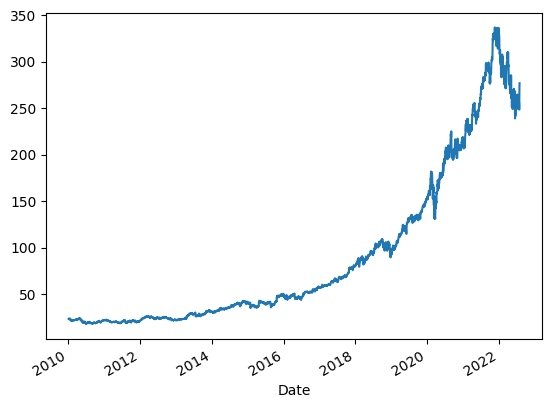

In [ ]:
df['Adj Close'].plot()

In [ ]:
y = pd.DataFrame(df['Adj Close'])
X = ['Open', 'High', 'Low', 'Volume']

In [ ]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[X])
feature_transform = pd.DataFrame(data=feature_transform, columns=X, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2010-01-04,0.023419,0.023839,0.024603,0.099340
2010-01-05,0.024135,0.023839,0.024760,0.135701
2010-01-06,0.024228,0.023778,0.024384,0.162738
2010-01-07,0.023450,0.022614,0.023351,0.138298
2010-01-08,0.022362,0.023165,0.023508,0.140343


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# Define the number of splits
n_splits = 10

# Initialize TimeSeriesSplit
timesplit = TimeSeriesSplit(n_splits=n_splits)

# Initialize variables to store training and test sets
X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []

# Perform time series splitting
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform.iloc[:len(train_index)], feature_transform.iloc[len(train_index): (len(train_index) + len(test_index))]
    y_train, y_test = y.iloc[:len(train_index)].values.ravel(), y.iloc[len(train_index): (len(train_index) + len(test_index))].values.ravel()

    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

# Concatenate the training and test sets
X_train = pd.concat(X_train_list, axis=0)
X_test = pd.concat(X_test_list, axis=0)
y_train = np.concatenate(y_train_list, axis=0)
y_test = np.concatenate(y_test_list, axis=0)


In [ ]:
import numpy as np

# Assuming X_train and X_test are your feature matrices

# Convert feature matrices to NumPy arrays
trainX = np.array(X_train)
testX = np.array(X_test)

# Reshape the feature matrices for LSTM
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])


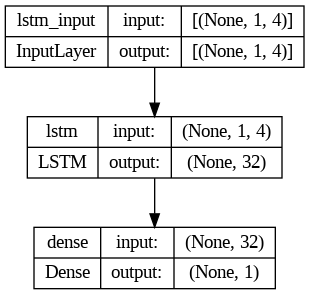

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_squared_error, r2_score
from keras.callbacks import ModelCheckpoint, EarlyStopping


# Assuming trainX.shape[1] is the number of features
input_shape = (1, trainX.shape[1])

# Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=input_shape, activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

# Plotting the model
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
# Train the model with callbacks
history = lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
1984/1984 [==============================] - 6s 2ms/step - loss: 430.1533
Epoch 2/100
1984/1984 [==============================] - 3s 2ms/step - loss: 87.4915
Epoch 3/100
1984/1984 [==============================] - 3s 2ms/step - loss: 4.7961
Epoch 4/100
1984/1984 [==============================] - 4s 2ms/step - loss: 1.0672
Epoch 5/100
1984/1984 [==============================] - 3s 2ms/step - loss: 0.6773
Epoch 6/100
1984/1984 [==============================] - 3s 2ms/step - loss: 0.6465
Epoch 7/100
1984/1984 [==============================] - 3s 2ms/step - loss: 0.6959
Epoch 8/100
1984/1984 [==============================] - 3s 2ms/step - loss: 0.7569
Epoch 9/100
1984/1984 [==============================] - 3s 2ms/step - loss: 0.7887
Epoch 10/100
1984/1984 [==============================] - 3s 2ms/step - loss: 0.8026
Epoch 11/100
1984/1984 [==============================] - 4s 2ms/step - loss: 0.8092
Epoch 12/100
1984/1984 [==============================] - 3s 2ms/step -

In [ ]:
y_pred= lstm.predict(X_test)

90/90 [==============================] - 1s 2ms/step


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 5.249195410097674
R-squared Score: 0.9992980840300911


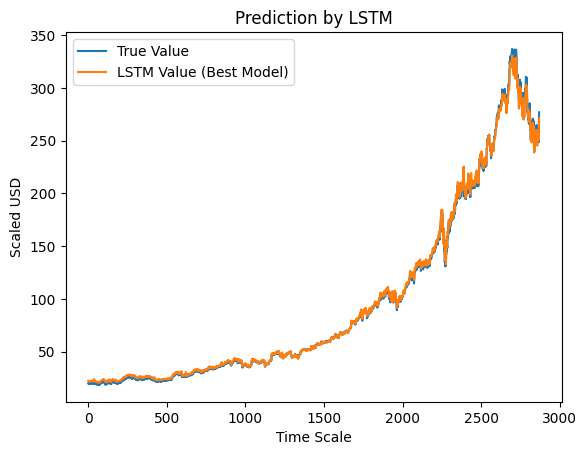

In [ ]:
# Plotting the true values and predictions
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value (Best Model)')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

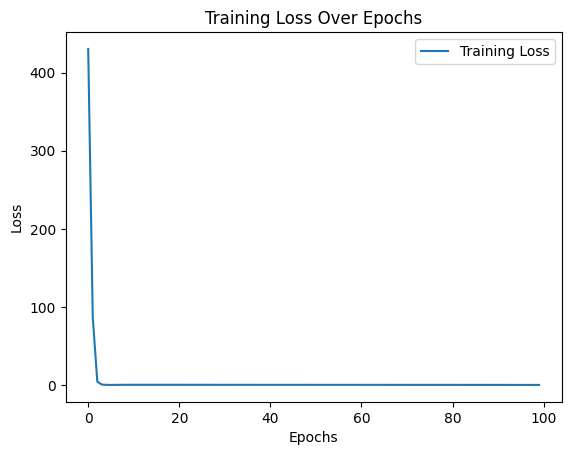

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.title("Training Loss Over Epochs")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

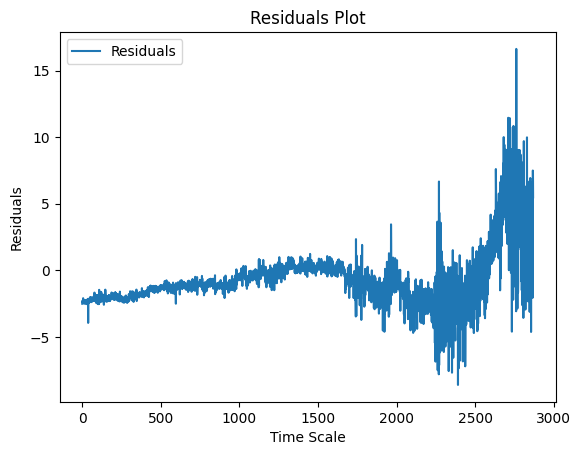

In [ ]:
residuals = y_test - y_pred.reshape(-1)
plt.plot(residuals, label='Residuals')
plt.title("Residuals Plot")
plt.xlabel('Time Scale')
plt.ylabel('Residuals')
plt.legend()
plt.show()
